<font size =10>TWITTER SENTIMENT ANALYSIS</font>

 I developed a sentiment analysis system to gauge public opinions and sentiments surrounding COVID-19 vaccines on Twitter. Leveraging a dataset of tweets related to COVID-19 vaccines, I utilized natural language processing (NLP) techniques and machine learning algorithms to analyze and classify tweets into positive, negative, or neutral sentiments.

In [31]:
#Importing all the required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  nltk
from textblob import TextBlob
import re
from nltk import word_tokenize
from nltk import stem
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load the data using pandas
df=pd.read_csv('vaccination_tweets.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
df.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [5]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [6]:
new_df=df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date','hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],axis=1)
new_df

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...
...,...
11015,"The number of Covid-19 cases today, 17 Novembe..."
11016,First dose ✅\n#PfizerBioNTech
11017,"The number of Covid-19 cases today, 16 Novembe..."
11018,#PfizerBioNTech has developed new pill #Paxlov...


In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


In [8]:
new_df.isnull().sum()

text    0
dtype: int64

In [9]:
print(new_df['text'].iloc[0],"\n")
print(new_df['text'].iloc[1],"\n")
print(new_df['text'].iloc[2],"\n")
print(new_df['text'].iloc[3],"\n")
print(new_df['text'].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [10]:
def preprocessing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)


In [11]:
new_df.text=new_df['text'].apply(preprocessing)
new_df

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...
...,...
11015,number covid19 cases today 17 november 2021 re...
11016,first dose pfizerbiontech
11017,number covid19 cases today 16 november 2021 re...
11018,pfizerbiontech developed new pill paxlovid inc...


In [12]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def stemming(data):
    text=[ps.stem(word) for word in data]
    return data



In [13]:
new_df['text']=new_df['text'].apply(lambda x: stemming(x))

In [14]:
new_df.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


In [16]:
new_df=new_df.drop_duplicates('text')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10543 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10543 non-null  object
dtypes: object(1)
memory usage: 164.7+ KB


In [17]:
new_df.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [18]:
def polarity(data):
    return TextBlob(data).sentiment.polarity

In [19]:
new_df['text'].isnull().sum()

0

In [20]:
new_df['polarity']=new_df.iloc[:,0].apply(lambda x: polarity(x))
new_df['polarity']

0        0.000000
1       -0.500000
2        0.000000
3        0.100000
4        0.000000
           ...   
11014    0.000000
11015    0.000000
11017    0.000000
11018   -0.121212
11019    0.000000
Name: polarity, Length: 10543, dtype: float64

In [21]:
def sentiment(data):
    if data>0:
        return 'positive'
    elif data==0:
        return 'neutral'
    else :
        return "negative"

In [22]:
new_df['sentiment']=new_df['polarity'].apply(lambda x:sentiment(x))
new_df['sentiment']


0         neutral
1        negative
2         neutral
3        positive
4         neutral
           ...   
11014     neutral
11015     neutral
11017     neutral
11018    negative
11019     neutral
Name: sentiment, Length: 10543, dtype: object

In [23]:
new_df.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,neutral
1,world wrong side history year hopefully bigges...,-0.5,negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,neutral
3,facts immutable senator even youre ethically s...,0.1,positive
4,explain need vaccine borisjohnson matthancock ...,0.0,neutral


<AxesSubplot:xlabel='sentiment', ylabel='count'>

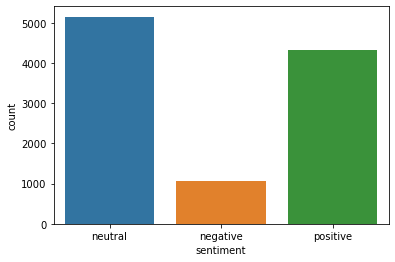

In [24]:
sns.countplot(data=new_df,x='sentiment')

In [25]:
pos = new_df[new_df.sentiment == 'positive']
pos = pos.sort_values(['polarity'], ascending= False)
pos.head()

,text,polarity,sentiment
9317,best way get merrygoround pfizer pfizerbiontec...,1.0,positive
2340,applying emotion pfizerbiontech based best evi...,1.0,positive
6295,pfizer jab morning efficient wellorganised tha...,1.0,positive
5041,get art printed awesome products support redbu...,1.0,positive
1055,already vaccinated getting vaccine soon plan t...,1.0,positive


Text(0.5, 1.0, 'Distribution of sentiments')

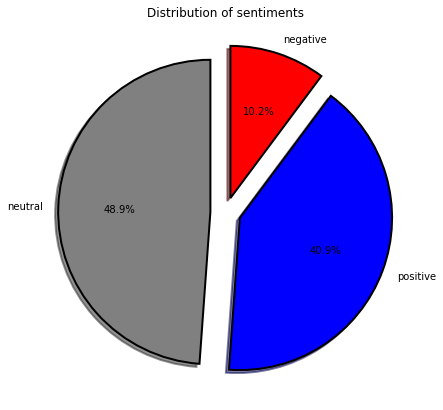

In [26]:
figure = plt.figure(figsize=(7,7))
colors = ("grey", "blue", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = new_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [27]:

from wordcloud import WordCloud
text = ' '.join([word for word in pos['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()




ModuleNotFoundError: No module named 'wordcloud'

In [28]:
neg = new_df[new_df.sentiment == 'negative']
neg = neg.sort_values(['polarity'], ascending= False)
neg.head()


,text,polarity,sentiment
2912,work skilled nursing facility got first vaccin...,-0.003333,negative
7256,200321 752308 vaccinations new daily record da...,-0.003409,negative
2073,ukgovernment cant even vaccinate properly ethi...,-0.004762,negative
7715,got first dose less waiting time airport vacci...,-0.005556,negative
7157,nas_k27 second dose due end next month well fa...,-0.006250,negative


In [29]:
neutral_tweets = new_df[new_df.sentiment == 'neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,neutral
7347,anyone else feel like framing vaccine card pfi...,0.0,neutral
7458,looking forward getting second pfizer shot any...,0.0,neutral
7454,never thought id running diff vaccine modernav...,0.0,neutral
7453,john___m dont get choose one person know asked...,0.0,neutral


In [32]:
vect = CountVectorizer(ngram_range=(1,2)).fit(new_df['text'])


In [33]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 78583

First 20 features:
 ['000', '000 doses', '000 initial', '000 people', '000 vaccines', '0000001', '0000001 covid19', '0011', '0011 abt', '004', '004 covid', '004 israelis', '01', '01 getting', '01 june', '01 november', '01aug2021', '01aug2021 doublevaxxed', '02', '02 175']


In [35]:
X = new_df['text']
Y = new_df['sentiment']
X = vect.transform(X)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [46]:
x_train.shape

(8434, 78583)

TRAING DATA USING LOGISTIC REGRESSION

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))


Test accuracy: 84.64%


In [54]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[  72  116   38]
 [   4 1008    9]
 [   8  149  705]]


              precision    recall  f1-score   support

    negative       0.86      0.32      0.46       226
     neutral       0.79      0.99      0.88      1021
    positive       0.94      0.82      0.87       862

    accuracy                           0.85      2109
   macro avg       0.86      0.71      0.74      2109
weighted avg       0.86      0.85      0.83      2109



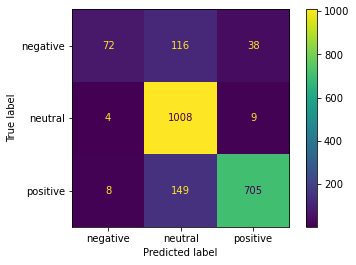

In [55]:
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()